In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv("Airline.csv")

In [3]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,38708,Male,disloyal Customer,27,Business travel,Eco,2583,3,3,3,...,5,2,4,3,2,3,5,43,48,neutral or dissatisfied
1,80210,Female,Loyal Customer,60,Personal Travel,Eco Plus,2475,1,1,1,...,4,1,4,3,4,4,4,0,0,neutral or dissatisfied
2,100450,Male,Loyal Customer,37,Business travel,Eco Plus,1180,1,2,2,...,1,4,5,2,4,2,1,11,4,neutral or dissatisfied
3,1262,Female,Loyal Customer,49,Personal Travel,Eco,134,3,3,3,...,4,4,3,4,1,4,4,8,3,neutral or dissatisfied
4,20024,Male,disloyal Customer,23,Business travel,Eco,528,1,5,1,...,2,2,5,2,4,1,2,9,6,neutral or dissatisfied


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 2597 non-null   int64 
 1   Gender                             2597 non-null   object
 2   Customer Type                      2597 non-null   object
 3   Age                                2597 non-null   int64 
 4   Type of Travel                     2597 non-null   object
 5   Class                              2597 non-null   object
 6   Flight Distance                    2597 non-null   int64 
 7   Inflight wifi service              2597 non-null   int64 
 8   Departure/Arrival time convenient  2597 non-null   int64 
 9   Ease of Online booking             2597 non-null   int64 
 10  Gate location                      2597 non-null   int64 
 11  Food and drink                     2597 non-null   int64 
 12  Online

In [5]:
data['Arrival Delay in Minutes'].isnull().sum()

0

In [7]:
data.dropna(inplace=True,axis=0,subset=['Arrival Delay in Minutes'])

In [26]:
data['satisfaction'].value_counts()

0    1438
1    1159
Name: satisfaction, dtype: int64

## Encoding categories

In [6]:
data['Gender']=data['Gender'].map({
    'Female':'0',
    'Male':'1'
})

In [7]:
data['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [8]:
data['Customer Type']=data['Customer Type'].map({
    'Loyal Customer':'1',
    'disloyal Customer':'0'
})

In [9]:
data['Type of Travel']=data['Type of Travel'].map({
    'Business travel':'1',
    'Personal Travel':'0'
})

In [10]:
data['Class']=data['Class'].map({
    'Eco':'0',
    'Business':'1',
    'Eco Plus':'2'
})

In [11]:
data['satisfaction']=data['satisfaction'].map({
    'satisfied':'1',
    'neutral or dissatisfied':'0'
})

In [12]:
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000
mean,64629.558722,39.541009,1204.757027,2.735464,3.050443,2.751637,2.952638,3.228725,3.286484,3.472468,3.367347,3.395841,3.367347,3.670774,3.318829,3.663073,3.298036,14.764729,15.716981
std,37257.919174,15.449865,1010.547048,1.335665,1.537712,1.402837,1.271832,1.332326,1.353654,1.313566,1.326736,1.272725,1.311845,1.148710,1.264973,1.182856,1.316208,41.584549,42.057352
min,61.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,32661.000000,27.000000,419.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64481.000000,40.000000,859.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,96285.000000,51.000000,1726.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,14.000000
max,129868.000000,80.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000


In [25]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,27,1,0,2583,3,3,3,3,...,5,2,4,3,2,3,5,43,48,0
1,0,1,60,0,2,2475,1,1,1,3,...,4,1,4,3,4,4,4,0,0,0
2,1,1,37,1,2,1180,1,2,2,2,...,1,4,5,2,4,2,1,11,4,0
3,0,1,49,0,0,134,3,3,3,3,...,4,4,3,4,1,4,4,8,3,0
4,1,0,23,1,0,528,1,5,1,2,...,2,2,5,2,4,1,2,9,6,0


In [13]:
data=data.drop(columns='id')

In [14]:
columns=['Gender','Customer Type','Type of Travel','Class','satisfaction']

for i in columns:
    data[i]=pd.to_numeric(data[i])

In [15]:
x=data.drop(columns='satisfaction')
y=data['satisfaction']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.75)

In [17]:
x_test.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
x_test.shape,y_test.shape

((1948, 22), (1948,))

In [32]:
model=keras.Sequential([
    keras.layers.Dense(22,input_shape=(22,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=200)

Epoch 1/200
21/21 [==============================] - 0s 721us/step - loss: 150.6341 - accuracy: 0.4607
Epoch 2/200
21/21 [==============================] - 0s 652us/step - loss: 105.8434 - accuracy: 0.4607
Epoch 3/200
21/21 [==============================] - 0s 695us/step - loss: 63.2178 - accuracy: 0.4715
Epoch 4/200
21/21 [==============================] - 0s 672us/step - loss: 17.4949 - accuracy: 0.5455
Epoch 5/200
21/21 [==============================] - 0s 624us/step - loss: 6.1661 - accuracy: 0.6025
Epoch 6/200
21/21 [==============================] - 0s 657us/step - loss: 4.9190 - accuracy: 0.6225
Epoch 7/200
21/21 [==============================] - 0s 648us/step - loss: 4.0467 - accuracy: 0.6148
Epoch 8/200
21/21 [==============================] - 0s 599us/step - loss: 3.2745 - accuracy: 0.6210
Epoch 9/200
21/21 [==============================] - 0s 549us/step - loss: 2.3031 - accuracy: 0.6348
Epoch 10/200
21/21 [==============================] - 0s 647us/step - loss: 1.5549 - 

21/21 [==============================] - 0s 549us/step - loss: 0.4906 - accuracy: 0.7689
Epoch 82/200
21/21 [==============================] - 0s 627us/step - loss: 0.4967 - accuracy: 0.7920
Epoch 83/200
21/21 [==============================] - 0s 597us/step - loss: 0.5863 - accuracy: 0.7535
Epoch 84/200
21/21 [==============================] - 0s 541us/step - loss: 0.4447 - accuracy: 0.8105
Epoch 85/200
21/21 [==============================] - 0s 549us/step - loss: 0.4475 - accuracy: 0.8243
Epoch 86/200
21/21 [==============================] - 0s 547us/step - loss: 0.4305 - accuracy: 0.8151
Epoch 87/200
21/21 [==============================] - 0s 548us/step - loss: 0.4492 - accuracy: 0.8074
Epoch 88/200
21/21 [==============================] - 0s 549us/step - loss: 0.5312 - accuracy: 0.7504
Epoch 89/200
21/21 [==============================] - 0s 549us/step - loss: 0.4592 - accuracy: 0.7982
Epoch 90/200
21/21 [==============================] - 0s 558us/step - loss: 0.4939 - accuracy: 

21/21 [==============================] - 0s 634us/step - loss: 0.4257 - accuracy: 0.8197
Epoch 161/200
21/21 [==============================] - 0s 549us/step - loss: 0.4034 - accuracy: 0.8444
Epoch 162/200
21/21 [==============================] - 0s 586us/step - loss: 0.3998 - accuracy: 0.8305
Epoch 163/200
21/21 [==============================] - 0s 529us/step - loss: 0.5815 - accuracy: 0.7612
Epoch 164/200
21/21 [==============================] - 0s 606us/step - loss: 0.3990 - accuracy: 0.8259
Epoch 165/200
21/21 [==============================] - 0s 547us/step - loss: 0.4496 - accuracy: 0.8120
Epoch 166/200
21/21 [==============================] - 0s 547us/step - loss: 0.4342 - accuracy: 0.8213
Epoch 167/200
21/21 [==============================] - 0s 499us/step - loss: 0.4188 - accuracy: 0.8074
Epoch 168/200
21/21 [==============================] - 0s 595us/step - loss: 0.3929 - accuracy: 0.8413
Epoch 169/200
21/21 [==============================] - 0s 648us/step - loss: 0.3826 - a

In [33]:
model.evaluate(x_test,y_test)

61/61 [==============================] - 0s 502us/step - loss: 0.7583 - accuracy: 0.7577


[0.7582988142967224, 0.7577002048492432]

In [34]:
yp=model.predict(x_test)

y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.80      1088
           1       0.80      0.60      0.68       860

    accuracy                           0.76      1948
   macro avg       0.77      0.74      0.74      1948
weighted avg       0.77      0.76      0.75      1948



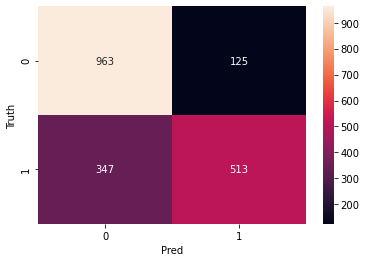

In [36]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Pred')
plt.ylabel('Truth');